In [1]:
import pandas as pd
from matplotlib import pyplot as plt



In [2]:
dorian_gray_df = pd.read_csv('../data/DorianGray/processed_characters.csv')
christmas_carol_df = pd.read_csv('../data/ChristmasCarol/processed_characters.csv')
pride_and_prejudice_df = pd.read_csv('../data/PrideAndPredjudice/processed_characters.csv')
silas_marner_df = pd.read_csv('../data/SilasMarner/processed_characters.csv')

In [3]:
dorian_gray_df

,Unnamed: 0,COREF,start_token,end_token,prop,cat,text,orig_coref,character_name
0,4,112,77,79,PROP,PER,Lord Henry Wotton,112.0,Lord Henry Wotton
1,6,112,156,156,PRON,PER,him,112.0,Lord Henry Wotton
2,14,113,289,290,PROP,PER,Basil Hallward,112.0,Basil Hallward
3,27,113,396,396,PROP,PER,Basil,113.0,Basil Hallward
4,29,112,408,409,PROP,PER,Lord Henry,113.0,Lord Henry Wotton
...,...,...,...,...,...,...,...,...,...
7166,14196,307,95668,95668,PRON,PER,he,NaN,Alan Campbell
7167,14197,307,95674,95674,PRON,PER,He,NaN,Alan Campbell
7168,14215,115,95814,95816,PROP,PER,Mr. Dorian Gray,NaN,Mr. Dorian Gray
7169,14232,268,95885,95885,PROP,PER,Francis,NaN,Francis Osborne


In [4]:
dorian_gray_counts = (dorian_gray_df.groupby(dorian_gray_df.prop).size()['PRON'], dorian_gray_df.groupby(dorian_gray_df.prop).size()['PROP'])
christmas_carol_counts = (christmas_carol_df.groupby(christmas_carol_df.prop).size()['PRON'], christmas_carol_df.groupby(christmas_carol_df.prop).size()['PROP'])
pride_and_prejudice_counts = (pride_and_prejudice_df.groupby(pride_and_prejudice_df.prop).size()['PRON'], pride_and_prejudice_df.groupby(pride_and_prejudice_df.prop).size()['PROP'])
silas_marner_counts = (silas_marner_df.groupby(silas_marner_df.prop).size()['PRON'], silas_marner_df.groupby(silas_marner_df.prop).size()['PROP'])
silas_marner_counts

(4877, 1691)

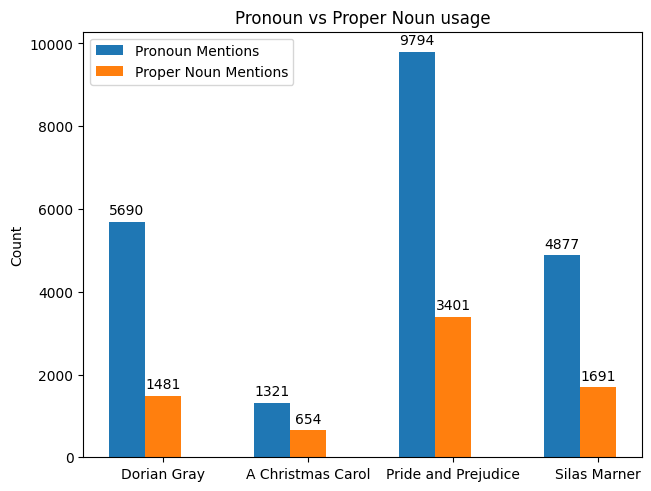

In [13]:
import numpy as np

pronoun_counts = [dorian_gray_counts[0], christmas_carol_counts[0], pride_and_prejudice_counts[0], silas_marner_counts[0]]
proper_noun_counts = [dorian_gray_counts[1], christmas_carol_counts[1], pride_and_prejudice_counts[1], silas_marner_counts[1]]

labels = ['Dorian Gray', 'A Christmas Carol', 'Pride and Prejudice', 'Silas Marner']
data = {
    'Pronoun Mentions': pronoun_counts,
    'Proper Noun Mentions': proper_noun_counts,
}

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, count in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, count, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Count')
ax.set_title('Pronoun vs Proper Noun usage')
ax.set_xticks(x + width, labels)
ax.legend(loc='upper left')

plt.savefig('pronoun-vs-proper-noun.png')
plt.show()